In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.stats import mode
from tqdm.notebook import tqdm
#from p_tqdm import p_map

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [10]:
df_ranking = pd.read_csv('/home/rchaban/LOPQ+Both+resnet18+256+20_ranking_top20_alg_sep.csv', index_col=None)

In [11]:
df_ranking

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Ph1_P0001_D01_S001_C4_az020,MSER,0001_D01_S001,0083_D01_S001,0001_D01_S001,0066_D01_S001,0192_D01_S001,0379_D01_S001,0398_D01_S001,0449_D01_S001,0236_D01_S001,0180_D01_S001,0042_D01_S001
1,Ph1_P0001_D01_S001_C4_az020,MI1,0001_D01_S001,0192_D01_S001,0001_D01_S001,0081_D01_S001,0684_D01_S001,0236_D01_S001,0449_D01_S001,0005_D01_S001,0398_D01_S001,0379_D02_S002,0379_D02_S001
2,Ph1_P0001_D01_S001_C4_az040,MSER,0001_D01_S001,0083_D01_S001,0001_D01_S001,0180_D01_S001,0066_D01_S001,0192_D01_S001,0398_D01_S001,0449_D01_S001,0236_D01_S001,0379_D01_S001,0101_D01_S001
3,Ph1_P0001_D01_S001_C4_az040,MI1,0001_D01_S001,0192_D01_S001,0001_D01_S001,0015_D01_S001,0684_D01_S001,0449_D01_S001,0236_D01_S001,0005_D01_S001,0379_D02_S002,0379_D02_S001,0398_D01_S001
4,Ph1_P0001_D01_S001_C4_az060,MSER,0001_D01_S001,0192_D01_S001,0684_D01_S001,0379_D02_S001,0801_D01_S001,0379_D02_S002,0083_D01_S001,0001_D01_S001,0807_D01_S001,0008_D01_S001,0777_D01_S001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101912,Ph3_P0898_D01_S001_C2_az300,MI1,0898_D01_S001,0898_D01_S001,0741_D01_S001,0680_D01_S001,0155_D01_S001,0142_D01_S001,0844_D01_S001,0151_D01_S001,0737_D01_S001,0123_D01_S001,0311_D01_S001
101913,Ph3_P0898_D01_S001_C2_az320,MSER,0898_D01_S001,0898_D01_S001,0534_D01_S001,0737_D01_S001,0798_D01_S001,0740_D01_S001,0680_D01_S001,0151_D01_S001,0122_D01_S001,0142_D01_S001,0141_D01_S001
101914,Ph3_P0898_D01_S001_C2_az320,MI1,0898_D01_S001,0898_D01_S001,0741_D01_S001,0151_D01_S001,0155_D01_S001,0142_D01_S001,0680_D01_S001,0500_D01_S001,0134_D01_S001,0491_D01_S005,0488_D01_S001
101915,Ph3_P0898_D01_S001_C2_az340,MSER,0898_D01_S001,0898_D01_S001,0737_D01_S001,0740_D01_S001,0680_D01_S001,0151_D01_S001,0122_D01_S001,0323_D01_S001,0775_D01_S001,0142_D01_S001,0277_D01_S001


In [12]:
cs = df_ranking.columns[3:].to_list()
pc = dict((zip(cs, [f"package_candidate_{i}" for i, c in enumerate(cs, start=1)])))
df_ranking.rename(columns=dict({'0': 'sample_actual', '1': 'segmentation_algorithm', '2': 'package_actual'}, **pc), inplace=True)
excluded_classes = ['0235_D01_S001', '0200_D01_S001', '0049_D01_S001', '0842_D01_S001', '0337_D01_S001', '0263_D01_S001', '0735_D01_S001', '0541_D01_S001', '0311_D01_S001']
len(excluded_classes)
df_ranking = df_ranking[~df_ranking.package_actual.isin(excluded_classes)]
df_ranking.package_actual.nunique()

991

In [30]:
df_ranking = df_ranking[df_ranking.segmentation_algorithm.isin(['MSER', 'MI1'])]

In [60]:
df_ranking.sample_actual.shape[0] / 2

50448.0

In [61]:
df_both.sample_actual.__len__()

50459

In [76]:
df_both

,package_candidate_1,package_candidate_2,package_candidate_3,package_candidate_4,package_candidate_5,package_candidate_6,package_candidate_7,package_candidate_8,package_candidate_9,package_candidate_10,package_candidate_11,package_candidate_12,package_candidate_13,package_candidate_14,package_candidate_15,package_candidate_16,package_candidate_17,package_candidate_18,package_candidate_19,package_candidate_20
sample_actual,,,,,,,,,,,,,,,,,,,,
Ph1_P0001_D01_S001_C4_az020,,,,,,,,,,,,,,,,,,,,
Ph1_P0001_D01_S001_C4_az040,,,,,,,,,,,,,,,,,,,,
Ph1_P0001_D01_S001_C4_az060,,,,,,,,,,,,,,,,,,,,
Ph1_P0001_D01_S001_C4_az080,,,,,,,,,,,,,,,,,,,,
Ph1_P0001_D01_S001_C4_az100,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ph3_P0898_D01_S001_C2_az260,,,,,,,,,,,,,,,,,,,,
Ph3_P0898_D01_S001_C2_az280,,,,,,,,,,,,,,,,,,,,
Ph3_P0898_D01_S001_C2_az300,,,,,,,,,,,,,,,,,,,,


In [87]:
df_both = pd.DataFrame()
df_both['sample_actual'] = df_ranking.sample_actual.unique()
df_both['package_actual'] = df_ranking['package_actual']

df_both = df_both.set_index('sample_actual')

for i in range(1, 21):
    df_both[f"package_candidate_{i}"] = ""
df_both = df_both.reset_index()
df_both['package_actual']
for ss, sample in enumerate(df_both.index):
    try:
        vals = df_ranking[df_ranking.sample_actual == sample][[c for c in df_ranking.columns if c.startswith('package_candidate')]].to_numpy().reshape(-1).tolist()
        df_both.loc[sample, [f"package_candidate_{c}" for c in range(1, 21)]] = vals
        if ss % 1000 == 0 and ss != 0:
            print(ss)
    except:
        pass

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000


In [88]:
df_both

,package_candidate_1,package_candidate_2,package_candidate_3,package_candidate_4,package_candidate_5,package_candidate_6,package_candidate_7,package_candidate_8,package_candidate_9,package_candidate_10,package_candidate_11,package_candidate_12,package_candidate_13,package_candidate_14,package_candidate_15,package_candidate_16,package_candidate_17,package_candidate_18,package_candidate_19,package_candidate_20
sample_actual,,,,,,,,,,,,,,,,,,,,
Ph1_P0001_D01_S001_C4_az020,0083_D01_S001,0001_D01_S001,0066_D01_S001,0192_D01_S001,0379_D01_S001,0398_D01_S001,0449_D01_S001,0236_D01_S001,0180_D01_S001,0042_D01_S001,0192_D01_S001,0001_D01_S001,0081_D01_S001,0684_D01_S001,0236_D01_S001,0449_D01_S001,0005_D01_S001,0398_D01_S001,0379_D02_S002,0379_D02_S001
Ph1_P0001_D01_S001_C4_az040,0083_D01_S001,0001_D01_S001,0180_D01_S001,0066_D01_S001,0192_D01_S001,0398_D01_S001,0449_D01_S001,0236_D01_S001,0379_D01_S001,0101_D01_S001,0192_D01_S001,0001_D01_S001,0015_D01_S001,0684_D01_S001,0449_D01_S001,0236_D01_S001,0005_D01_S001,0379_D02_S002,0379_D02_S001,0398_D01_S001
Ph1_P0001_D01_S001_C4_az060,0192_D01_S001,0684_D01_S001,0379_D02_S001,0801_D01_S001,0379_D02_S002,0083_D01_S001,0001_D01_S001,0807_D01_S001,0008_D01_S001,0777_D01_S001,0001_D01_S001,0192_D01_S001,0015_D01_S001,0449_D01_S001,0684_D01_S001,0236_D01_S001,0016_D01_S001,0066_D01_S001,0081_D01_S001,0429_D01_S001
Ph1_P0001_D01_S001_C4_az080,0001_D01_S001,0192_D01_S001,0012_D01_S001,0048_D01_S001,0379_D01_S001,0015_D01_S001,0083_D01_S001,0236_D01_S001,0449_D01_S001,0398_D01_S001,0192_D01_S001,0001_D01_S001,0449_D01_S001,0684_D01_S001,0236_D01_S001,0005_D01_S001,0015_D01_S001,0081_D01_S001,0429_D01_S001,0037_D01_S002
Ph1_P0001_D01_S001_C4_az100,0001_D01_S001,0398_D01_S001,0449_D01_S001,0083_D01_S001,0066_D01_S001,0192_D01_S001,0236_D01_S001,0101_D01_S001,0379_D01_S001,0201_D01_S001,0001_D01_S001,0192_D01_S001,0449_D01_S001,0684_D01_S001,0236_D01_S001,0005_D01_S001,0015_D01_S001,0429_D01_S001,0026_D01_S003,0037_D02_S002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ph3_P0898_D01_S001_C2_az260,0898_D01_S001,0223_D02_S001,0737_D01_S001,0740_D01_S001,0680_D01_S001,0741_D01_S001,0151_D01_S001,0122_D01_S001,0142_D01_S001,0277_D01_S001,0898_D01_S001,0151_D01_S001,0741_D01_S001,0737_D01_S001,0844_D01_S001,0740_D01_S001,0123_D01_S001,0500_D01_S001,0134_D01_S001,0488_D01_S001
Ph3_P0898_D01_S001_C2_az280,0898_D01_S001,0134_D01_S001,0021_D01_S001,0324_D01_S001,0737_D01_S001,0740_D01_S001,0680_D01_S001,0151_D01_S001,0122_D01_S001,0775_D01_S001,0898_D01_S001,0741_D01_S001,0155_D01_S001,0151_D01_S001,0142_D01_S001,0681_D01_S001,0123_D01_S001,0409_D01_S001,0500_D01_S001,0134_D01_S001
Ph3_P0898_D01_S001_C2_az300,0898_D01_S001,0798_D01_S001,0813_D01_S001,0737_D01_S001,0740_D01_S001,0680_D01_S001,0151_D01_S001,0122_D01_S001,0141_D01_S001,0277_D01_S001,0898_D01_S001,0741_D01_S001,0680_D01_S001,0155_D01_S001,0142_D01_S001,0844_D01_S001,0151_D01_S001,0737_D01_S001,0123_D01_S001,0311_D01_S001


In [72]:
df_ranking[df_ranking.sample_actual == sample][[c for c in df_ranking.columns if c.startswith('package_candidate')]].to_numpy().reshape(-1).tolist()

['0083_D01_S001',
 '0001_D01_S001',
 '0066_D01_S001',
 '0192_D01_S001',
 '0379_D01_S001',
 '0398_D01_S001',
 '0449_D01_S001',
 '0236_D01_S001',
 '0180_D01_S001',
 '0042_D01_S001',
 '0192_D01_S001',
 '0001_D01_S001',
 '0081_D01_S001',
 '0684_D01_S001',
 '0236_D01_S001',
 '0449_D01_S001',
 '0005_D01_S001',
 '0398_D01_S001',
 '0379_D02_S002',
 '0379_D02_S001']

In [31]:
guesses_list = list(range(1, len(cs) + 1))
len(guesses_list)

10

In [136]:
df_both.package_actual = df_both.sample_actual.str[5:-9]

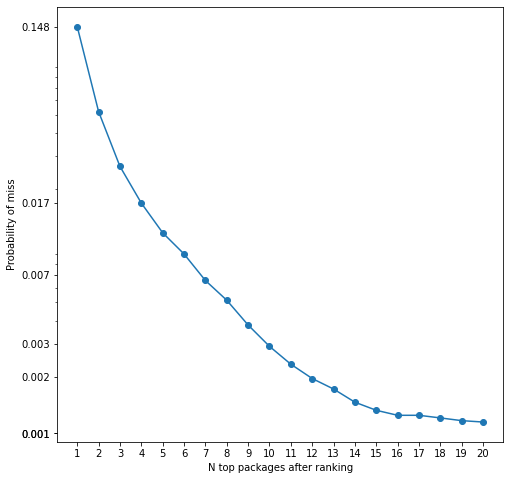

In [152]:
guess_list = [1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18, 9, 19, 10, 20]
for guess, guess1 in zip(list(range(1, 21)), guess_list):
    df_both[f'guess_{guess}'] = df_both['package_actual'] == df_both[f'package_candidate_{guess1}']
total_b = df_both.index.__len__()

guess_columns = [c for c in df_both.columns if c.startswith('guess_')]
probability_of_miss = []
for top in list(range(1, 21)):
    df_both[f"top_{top}"] = df_both[guess_columns[:top]].any(axis=1)
    probability_of_miss.append(1 - df_both[f"top_{top}"].value_counts()[True] / total_b)

plt.figure(figsize=(8, 8))
p = plt.plot(probability_of_miss, 'o-', label='Class and distinct')
# plt.legend([p1], labels=['Class and distinct'])
plt.yscale('log')
plt.xticks(np.arange(20), list(range(1, 21)))
rounded = np.around(probability_of_miss[::3], 3)
plt.yticks(rounded, rounded)
plt.xlabel('N top packages after ranking')
plt.ylabel('Probability of miss')
plt.savefig('combined.png')

In [138]:
df_both.top_2.value_counts()

[0.14776353078737192,
 0.08204681028161476,
 0.06151528964109476,
 0.05206207019560438,
 0.045442834776749486,
 0.041340494262668726,
 0.03862541865673119,
 0.03644543094393471,
 0.034919439544977116,
 0.03382944568857882,
 0.005549059632573017,
 0.002873620166868096,
 0.0022592599932618196,
 0.0018827166610515533,
 0.0016052636794229302,
 0.0013872649081432264,
 0.0012683564874452768,
 0.0012089022770962465,
 0.0011692661368636337,
 0.0011494480667472162]

In [139]:
0.0011494480667472162 * 54000

62.07019560434968

<ipython-input-150-f51e5d0b47f7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ranking_alg[f"top_{top}"] = df_ranking_alg[guess_columns[:top]].any(axis=1)
<ipython-input-150-f51e5d0b47f7>:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(plots, labels=df_ranking.segmentation_algorithm.unique()) #


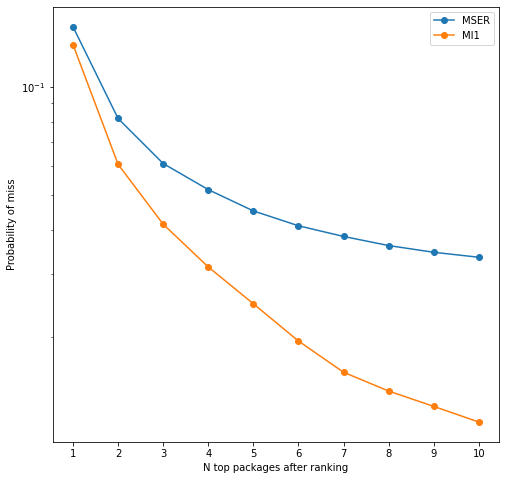

In [150]:
for guess in guesses_list:
    df_ranking[f'guess_{guess}'] = df_ranking['package_actual'] == df_ranking[f'package_candidate_{guess}']
total = int(df_ranking.shape[0] / 2)
total
plots = []
prob_alg = {}
plt.figure(figsize=(8,8))

for alg in df_ranking.segmentation_algorithm.unique():
    df_ranking_alg = df_ranking[df_ranking.segmentation_algorithm == alg]
    guess_columns = [c for c in df_ranking_alg.columns if c.startswith('guess_')]
    probability_of_miss = list()

    for top in guesses_list:
        df_ranking_alg[f"top_{top}"] = df_ranking_alg[guess_columns[:top]].any(axis=1)
        probability_of_miss.append(df_ranking_alg[f"top_{top}"].value_counts()[False] / total)
        
    p = plt.plot(probability_of_miss, 'o-', label='Class and distinct')
    # plt.legend([p1], labels=['Class and distinct'])
    plt.yscale('log')
    plt.xticks(np.arange(len(guesses_list)), guesses_list)
    rounded = np.around(probability_of_miss[::3], 3)
    #plt.yticks(rounded, rounded)
    plt.xlabel('N top packages after ranking')
    plt.ylabel('Probability of miss')
    plots.append(p)
    prob_alg[alg] = probability_of_miss

plt.legend(plots, labels=df_ranking.segmentation_algorithm.unique()) # 
#plt.savefig(f'top_{len(cs)}_algs.png')

#plt.xticks(df_plot.index.to_list(), df_plot.index.to_list())

ValueError: Length of values (50448) does not match length of index (50488)

In [50]:
list(range(1, 21))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [84]:
probability_of_miss[-1]

0.0013667425968109104

In [61]:
df_ranking[df_ranking.top_30 == False].sample_actual.to_csv('to_investigate.csv', index=False)

In [85]:
df_ranking

,sample_actual,package_actual,package_1,package_2,package_3,package_4,package_5,package_6,package_7,package_8,...,top_11,top_12,top_13,top_14,top_15,top_16,top_17,top_18,top_19,top_20
0,Ph1_P0001_D01_S001_C4_az020,0001_D01_S001,0083_D01_S001,0192_D01_S001,0001_D01_S001,0001_D01_S001,0066_D01_S001,0081_D01_S001,0192_D01_S001,0684_D01_S001,...,True,True,True,True,True,True,True,True,True,True
1,Ph1_P0001_D01_S001_C4_az040,0001_D01_S001,0083_D01_S001,0192_D01_S001,0001_D01_S001,0001_D01_S001,0180_D01_S001,0015_D01_S001,0066_D01_S001,0684_D01_S001,...,True,True,True,True,True,True,True,True,True,True
2,Ph1_P0001_D01_S001_C4_az060,0001_D01_S001,0192_D01_S001,0001_D01_S001,0684_D01_S001,0192_D01_S001,0379_D02_S001,0015_D01_S001,0801_D01_S001,0449_D01_S001,...,True,True,True,True,True,True,True,True,True,True
3,Ph1_P0001_D01_S001_C4_az080,0001_D01_S001,0001_D01_S001,0192_D01_S001,0192_D01_S001,0001_D01_S001,0012_D01_S001,0449_D01_S001,0048_D01_S001,0684_D01_S001,...,True,True,True,True,True,True,True,True,True,True
4,Ph1_P0001_D01_S001_C4_az100,0001_D01_S001,0001_D01_S001,0001_D01_S001,0398_D01_S001,0192_D01_S001,0449_D01_S001,0449_D01_S001,0083_D01_S001,0684_D01_S001,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50986,Ph3_P0898_D01_S001_C2_az260,0898_D01_S001,0898_D01_S001,0898_D01_S001,0223_D02_S001,0151_D01_S001,0737_D01_S001,0741_D01_S001,0740_D01_S001,0737_D01_S001,...,True,True,True,True,True,True,True,True,True,True
50987,Ph3_P0898_D01_S001_C2_az280,0898_D01_S001,0898_D01_S001,0898_D01_S001,0134_D01_S001,0741_D01_S001,0021_D01_S001,0155_D01_S001,0324_D01_S001,0151_D01_S001,...,True,True,True,True,True,True,True,True,True,True
50988,Ph3_P0898_D01_S001_C2_az300,0898_D01_S001,0898_D01_S001,0898_D01_S001,0798_D01_S001,0741_D01_S001,0813_D01_S001,0680_D01_S001,0737_D01_S001,0155_D01_S001,...,True,True,True,True,True,True,True,True,True,True
50989,Ph3_P0898_D01_S001_C2_az320,0898_D01_S001,0898_D01_S001,0898_D01_S001,0534_D01_S001,0741_D01_S001,0737_D01_S001,0151_D01_S001,0798_D01_S001,0155_D01_S001,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
fill_value = 100
dfsingle = dfs[0]

sample_actual = dfsingle.iloc[0].sample_actual
package_actual = dfsingle.iloc[0].package_actual
package_actual_ns = dfsingle.iloc[0].package_actual[:-5]

In [ ]:
df_piv = dfsingle.pivot_table(
    index='package_predicted', columns='descriptor_actual', values='distance', fill_value=np.nan,
    aggfunc=[np.mean, np.median, 'count', sum, np.std, np.var])
#df_piv = df_piv.swaplevel(axis='columns')
df_piv = df_piv.reset_index()

In [ ]:
df_piv

In [ ]:
df_rank = pd.DataFrame(columns=df_piv.columns)

In [ ]:
rank_ascending = ['mean', 'median', 'sum', 'std', 'var']
rank_descending = ['count']

df_rank.loc[:, rank_ascending] = df_piv[rank_ascending].rank(method='dense', na_option='bottom', ascending=True)
df_rank.loc[:, rank_descending] = df_piv[rank_descending].rank(method='dense', na_option='bottom', ascending=False)
df_rank['index'] = df_piv['index']

guess_rankings = dict()

for desc_index in df_piv.columns.levels[1].to_list()[:-1]:
    df_rank.loc[:, ('rank_sum', desc_index)] = df_rank.loc[:, (rank_ascending + rank_descending, desc_index)].sum(axis=1)
    guesses = df_rank.loc[df_rank.loc[:, ('rank_sum', desc_index)].nsmallest(5).index, 'index'].to_list()
    
    for rank, guess in enumerate(guesses, start=1):
        if guess in guess_rankings.keys():
            guess_rankings[guess].append(rank)
        else:
            guess_rankings[guess] = [rank]
top_guesses = [s[0] for s in sorted(guess_rankings.items(), key=lambda x: len(x[1]), reverse=True)][:5]

In [ ]:
package_actual == top_guesses